In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

In [54]:
df = pd.read_csv('data/df_sem_duplicatas.csv')

In [55]:

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['descricao'])

# Codifique as categorias
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['categoria'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





In [66]:
#Modelo base line
model = xgb.XGBClassifier()
history = model.fit(X_train, y_train)
y_pred = model.predict(X_test)



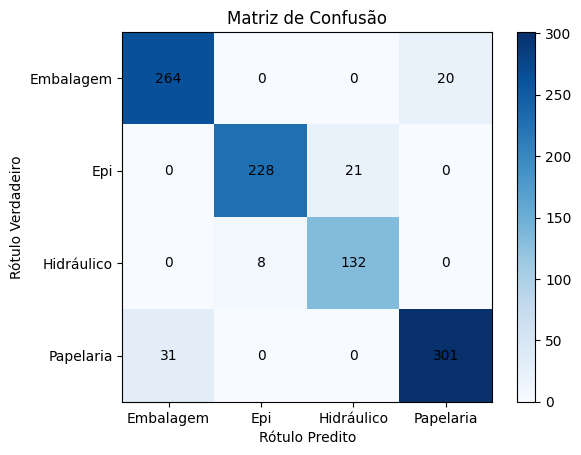

In [67]:
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred)
conf_matrix = confusion_matrix(y_test_original,y_pred_original)
labels = np.unique(y_pred_original)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center')
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Predito')
plt.show()

In [68]:
accuracy = accuracy_score(y_test, y_pred)
print('Acurácia:', accuracy)
print('Relatório de Classificação:')
print(classification_report(y_test, y_pred))

Acurácia: 0.9203980099502488
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       284
           1       0.97      0.92      0.94       249
           2       0.86      0.94      0.90       140
           3       0.94      0.91      0.92       332

    accuracy                           0.92      1005
   macro avg       0.92      0.92      0.92      1005
weighted avg       0.92      0.92      0.92      1005

